In [277]:
pip install wordcloud


time: 6.61 s (started: 2025-02-27 23:08:21 +05:30)


In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

time: 1.67 s (started: 2025-02-27 23:08:33 +05:30)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prathamesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Importing module to see execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2025-02-27 09:34:48 +05:30)


In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/amazon_alexa.tsv"

In [279]:
file_path = r"C:\Users\Prathamesh\Downloads\amazon_alexa.tsv"

time: 15 ms (started: 2025-02-27 23:08:42 +05:30)


In [280]:
df = pd.read_csv(file_path, delimiter = '\t', quoting = 3)

time: 406 ms (started: 2025-02-27 23:08:45 +05:30)


In [281]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


time: 78 ms (started: 2025-02-27 23:08:47 +05:30)


In [282]:
df.sample(10)

,rating,date,variation,verified_reviews,feedback
71,5,30-Jul-18,Charcoal Fabric,Works and sounds great.,1
92,5,30-Jul-18,Heather Gray Fabric,Good sound works well,1
1544,5,30-Jul-18,Black Show,"""Love it! Easy setup and I can ‘Drop in’ on my...",1
1533,5,30-Jul-18,Black Show,I've had previous experience with the echo Dot...,1
2137,5,30-Jul-18,Configuration: Fire TV Stick,Love the TV/movie selection. I really like the...,1
2642,5,30-Jul-18,Black Dot,Works like a charm.,1
144,5,30-Jul-18,Charcoal Fabric,Everyone should have an Echo or two or three o...,1
289,5,29-Jul-18,Charcoal Fabric,"""I replaced my 1st gen, was concerned about a ...",1
716,5,30-Jul-18,Charcoal Fabric,"""We love Alexa! We use her to play music, play...",1
1547,4,30-Jul-18,Black Show,"""Show has been great. Still learning what it c...",1


time: 47 ms (started: 2025-02-27 23:08:53 +05:30)


### Dataset Rows & Columns count

In [283]:
# Dataset Rows & Columns count
print(f" rows in Amazon Alexa data are {df.shape[0]} and columns are {df.shape[1]}")

 rows in Amazon Alexa data are 3150 and columns are 5
time: 16 ms (started: 2025-02-27 23:08:56 +05:30)


### Dataset Information

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
time: 93 ms (started: 2025-02-27 23:08:58 +05:30)


#### Missing Values/Null Values

In [285]:
#### Missing Values/Null Values
print(df.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
time: 0 ns (started: 2025-02-27 23:09:01 +05:30)


In [286]:
#Getting the record where 'verified_reviews' is null

df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


time: 16 ms (started: 2025-02-27 23:09:03 +05:30)


In [287]:
#We will drop the null record

df.dropna(inplace=True)

time: 0 ns (started: 2025-02-27 23:09:06 +05:30)


In [288]:
df.shape

(3150, 5)

time: 0 ns (started: 2025-02-27 23:09:08 +05:30)


### We will consider 1000 random records for our analysis

In [289]:
new_df = df.sample(1000,random_state=2)

time: 31 ms (started: 2025-02-27 23:10:02 +05:30)


In [290]:
new_df.shape

(1000, 5)

time: 0 ns (started: 2025-02-27 23:10:04 +05:30)


### Creating some new features

In [291]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

new_df['review_length'] = new_df['verified_reviews'].str.len()
new_df['review_words']  = new_df['verified_reviews'].apply(lambda row: len(row.split(" ")) )


time: 31 ms (started: 2025-02-27 23:10:07 +05:30)


In [292]:
new_df.head(5)

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1455,5,30-Jul-18,Black Show,"""Great item for knowledge, directions, music,l...",1,63,8
788,5,30-Jul-18,Charcoal Fabric,Love it and Alexa. I am not very savvy but sup...,1,80,16
355,4,30-Jul-18,Black,Works just fine.,1,16,3
338,3,28-Jul-18,Charcoal Fabric,Beyond my capabilities to program. Grandkids l...,1,51,8
3141,3,30-Jul-18,Black Dot,,1,1,2


time: 0 ns (started: 2025-02-27 23:10:10 +05:30)


## Analyzing 'rating' column

In [293]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{new_df['rating'].value_counts()}")

Rating value count: 
5    716
4    137
3     61
1     59
2     27
Name: rating, dtype: int64
time: 15 ms (started: 2025-02-27 23:10:13 +05:30)


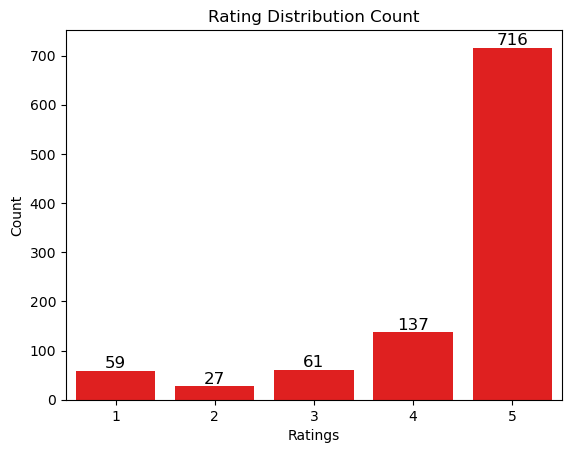

time: 922 ms (started: 2025-02-27 23:10:18 +05:30)


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot
plots = sns.barplot(x=new_df['rating'].value_counts().index,
                    y=new_df['rating'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize plot
plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Show plot
plt.show()


In [295]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(new_df['rating'].value_counts()/new_df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    71.6
4    13.7
3     6.1
1     5.9
2     2.7
Name: rating, dtype: float64
time: 16 ms (started: 2025-02-27 23:10:22 +05:30)


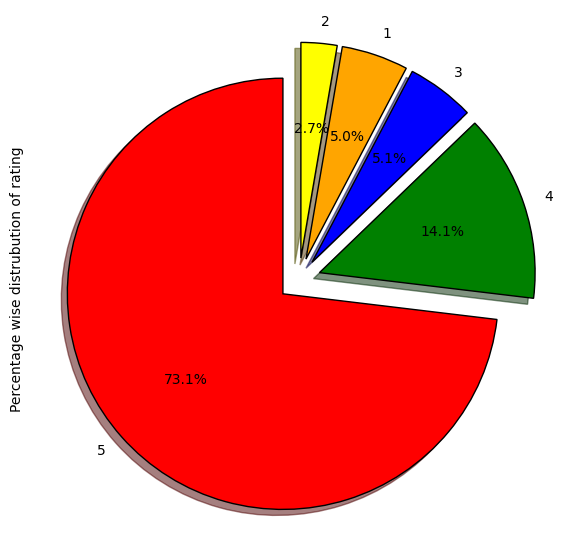

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['rating'].value_counts()/new_df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

## Analyzing 'feedback' column

In [ ]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{new_df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    923
0     77
Name: count, dtype: int64


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = new_df[new_df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

"This product currently has two related software flaws that make it completely unusable:1) There is a &#34;card&#34; on the homescreen called &#34;Things To Try&#34; -- it's an ad for other Alexa services you can try. You can turn off all the other homescreen cards, but not this one.2) By default, the homescreen cards &#34;cycle&#34; automatically, which is incredibly annoying. There is a setting where you can opt to have the cards only &#34;cycle once&#34; instead of &#34;cycle continuously&#34;, but critically *this setting does not work*. My unit has been set to &#34;cycle once&#34;, and the cards still continue to cycle all the time. Have rebooted the device, re-set, etc etc.Until these two obvious software issues are fixed, in my opinion the product is useless."


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = new_df[new_df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

"Love it! I was thinking about getting one and when the prime day discount was offered, I could not pass it up! It's fun to ask Alexa to play any song or group and she comes up with a playlist from Amazon Prime Music. You can also connect your iPhone with bluetooth and play music with Pandora or YouTube videos using Alexa as a speaker. I've been having fun asking Alexa different types of questions or for information like weather, news or even the time in other countries. The only downside is if you have limited data on your wifi plan, because Alexa uses burns it up when playing music."


#### From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

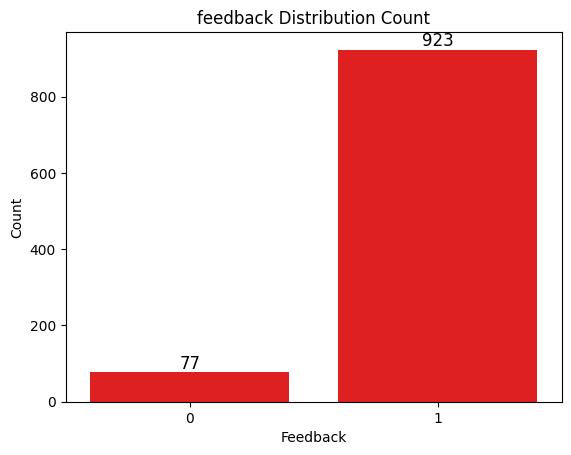

In [ ]:
# Create bar plot
plots = sns.barplot(x=new_df['feedback'].value_counts().index,
                    y=new_df['feedback'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize plot
plt.title('feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(new_df['feedback'].value_counts()/new_df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    92.3
0     7.7
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

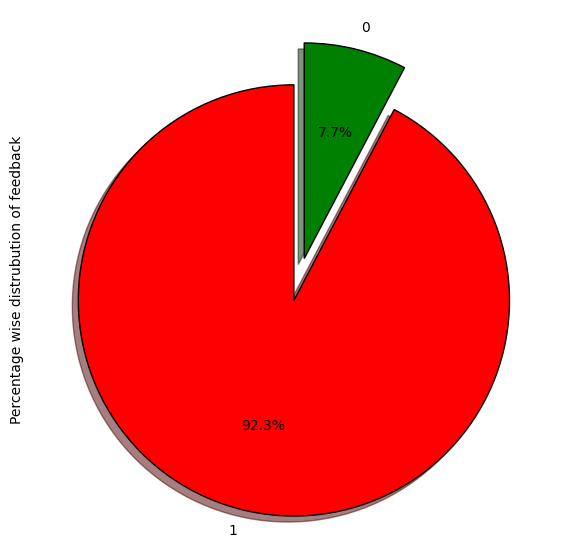

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['feedback'].value_counts()/new_df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

### Let's see the 'rating' values for different values of 'feedback'

In [ ]:
#Feedback = 0
new_df[new_df['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,50
2,27


In [ ]:
#Feedback = 1
new_df[new_df['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,731
4,141
3,51


If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

## Analyzing 'variation' column

In [ ]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{new_df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      172
Charcoal Fabric                 138
Configuration: Fire TV Stick    104
Black  Plus                      92
Black  Show                      89
Black  Spot                      77
Black                            70
White  Dot                       62
Heather Gray Fabric              48
White  Spot                      36
White  Show                      31
White                            29
White  Plus                      26
Sandstone Fabric                 21
Walnut Finish                     3
Oak Finish                        2
Name: count, dtype: int64


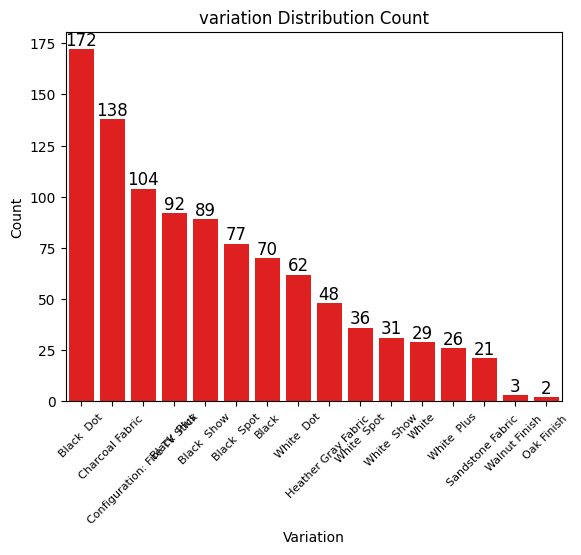

In [ ]:
# Create bar plot
plots = sns.barplot(x=new_df['variation'].value_counts().index,
                    y=new_df['variation'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize x-axis labels
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels by 45 degrees and reduce font size

# Customize plot
plt.title('variation Distribution Count')
plt.xlabel('Variation')
plt.ylabel('Count')

# Show plot
plt.show()


In [ ]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(new_df['variation'].value_counts()/new_df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      17.2
Charcoal Fabric                 13.8
Configuration: Fire TV Stick    10.4
Black  Plus                      9.2
Black  Show                      8.9
Black  Spot                      7.7
Black                            7.0
White  Dot                       6.2
Heather Gray Fabric              4.8
White  Spot                      3.6
White  Show                      3.1
White                            2.9
White  Plus                      2.6
Sandstone Fabric                 2.1
Walnut Finish                    0.3
Oak Finish                       0.2
Name: count, dtype: float64


In [ ]:
new_df['variation'].nunique()

16

<Axes: ylabel='Percentage wise distrubution of variation'>

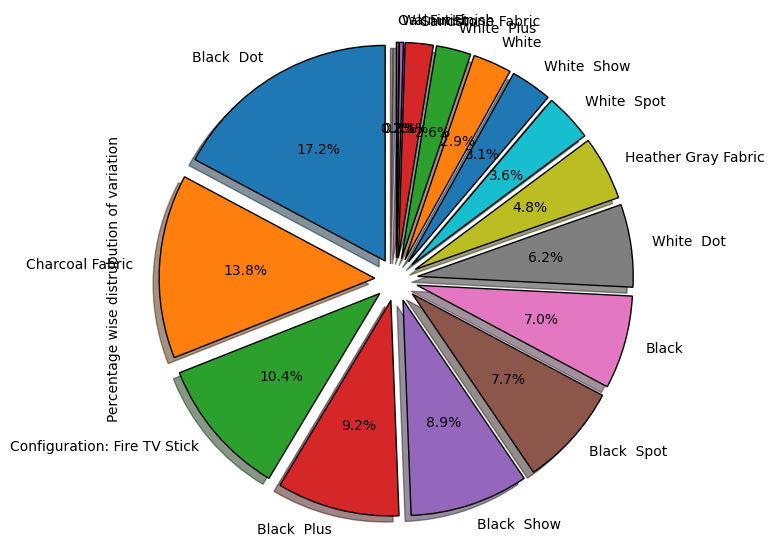

In [ ]:
fig = plt.figure(figsize=(7,7))

#colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['variation'].value_counts()/new_df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%0.1f%%", shadow=True,  startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of variation')

## Analyzing 'verified_reviews' column

In [ ]:
new_df.head(3)

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1456,4,30-Jul-18,Black Show,very nice-needs some work,1,25,4
789,5,30-Jul-18,Charcoal Fabric,"""Love it! I was thinking about getting one and...",1,592,110
355,4,30-Jul-18,Black,Works just fine.,1,16,3


[Text(0.5, 1.0, 'Distribution of review_length')]

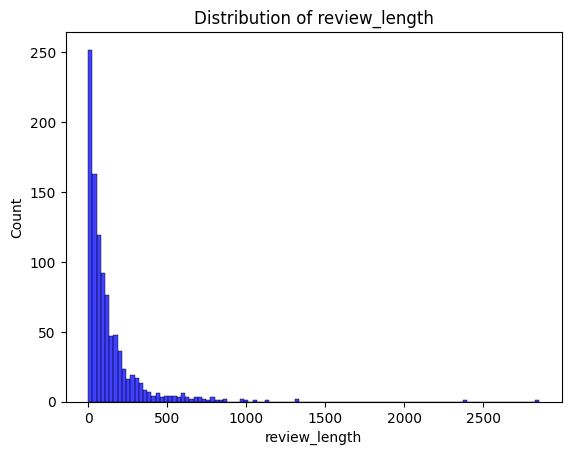

In [ ]:
sns.histplot(new_df['review_length'],color='blue').set(title='Distribution of review_length')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

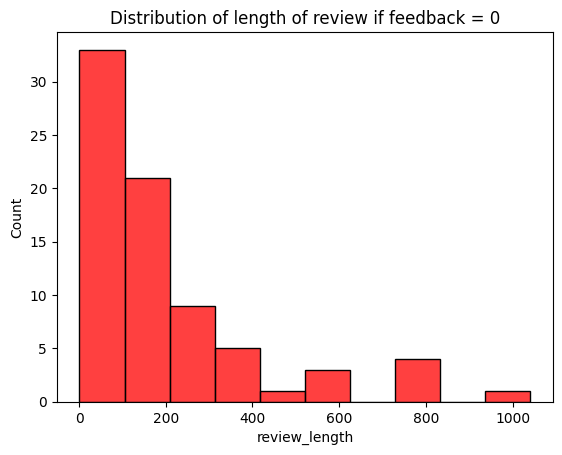

In [ ]:
# Length analysis when feedback is 0 (negative)
sns.histplot(new_df[new_df['feedback']==0]['review_length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

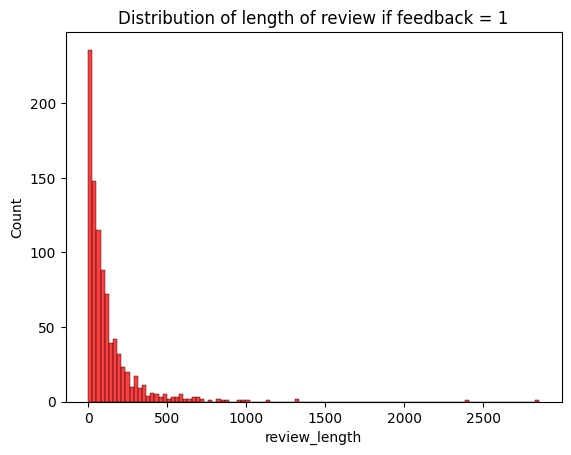

In [ ]:
# Length analysis when feedback is 1 (positive)
sns.histplot(new_df[new_df['feedback']==1]['review_length'],color='red').set(title='Distribution of length of review if feedback = 1')

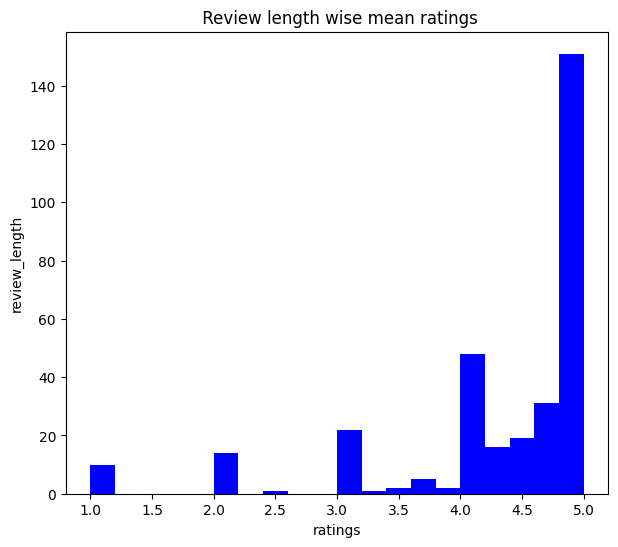

In [ ]:
# Length wise mean rating
new_df.groupby('review_length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('review_length')
plt.show()

#### Review words

[Text(0.5, 1.0, 'Distribution of review_words')]

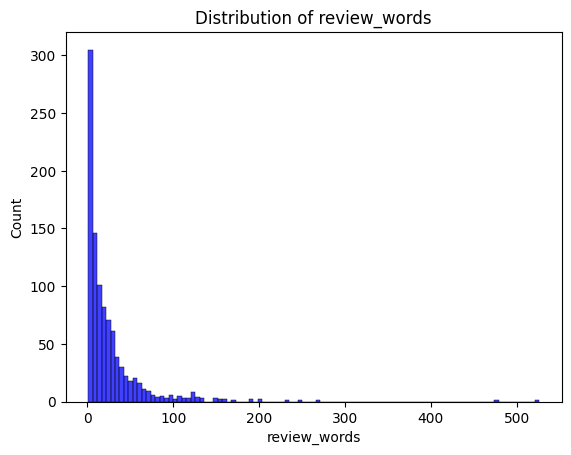

In [ ]:
sns.histplot(new_df['review_words'],color='blue').set(title='Distribution of review_words')

[Text(0.5, 1.0, 'Distribution of length of review words if feedback = 0')]

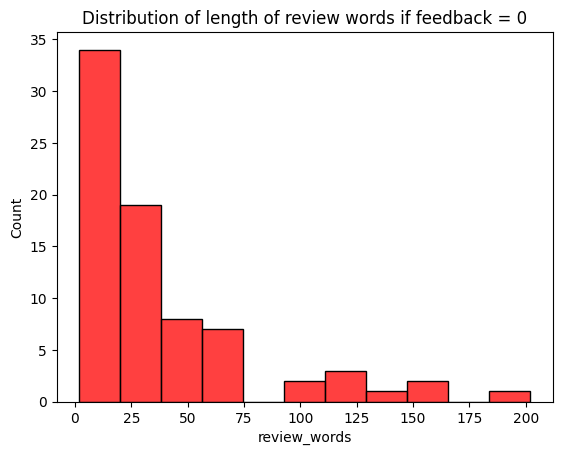

In [ ]:
# word analysis when feedback is 0 (negative)
sns.histplot(new_df[new_df['feedback']==0]['review_words'],color='red').set(title='Distribution of length of review words if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review words if feedback = 1')]

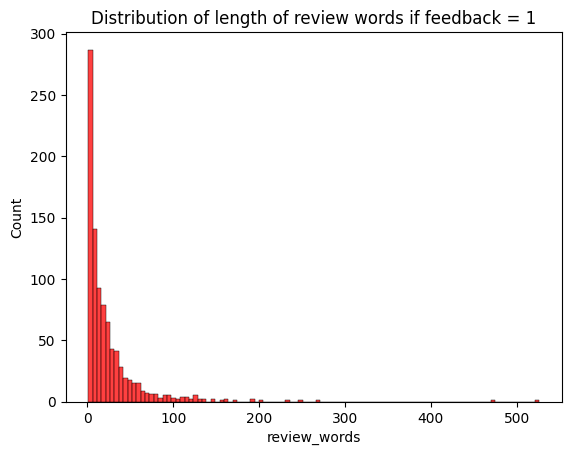

In [ ]:
# word analysis when feedback is 1 (positive)
sns.histplot(new_df[new_df['feedback']==1]['review_words'],color='red').set(title='Distribution of length of review words if feedback = 1')

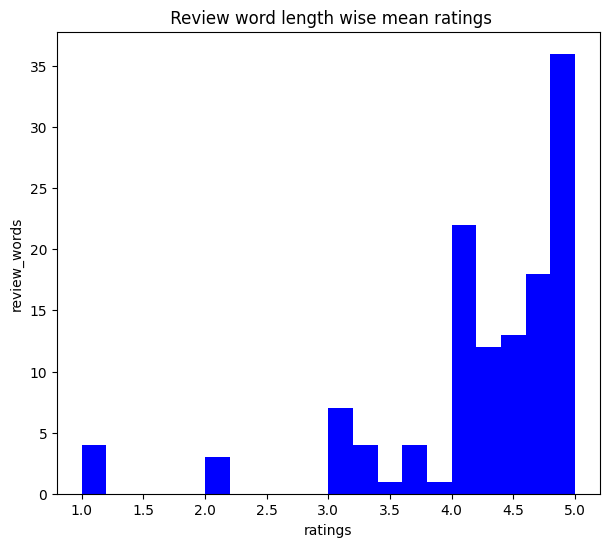

In [ ]:
# Length wise mean rating
new_df.groupby('review_words')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review word length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('review_words')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(new_df.verified_reviews)

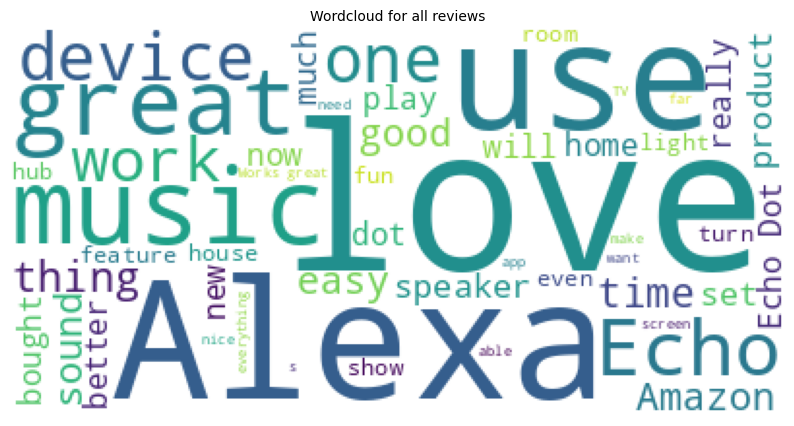

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in new_df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in new_df[new_df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in new_df[new_df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

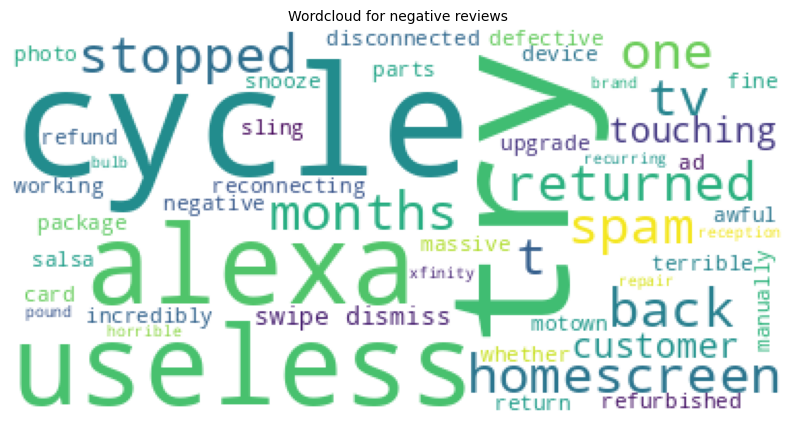

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

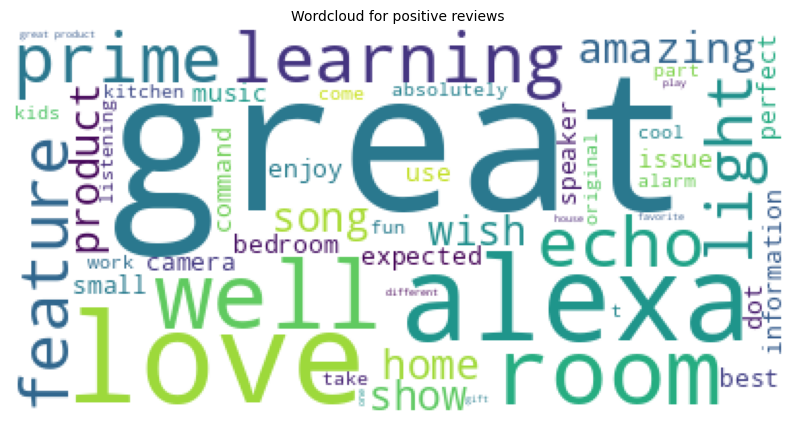

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

## Preprocessing

In [296]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')


    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

time: 15 ms (started: 2025-02-27 23:10:42 +05:30)


In [297]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

time: 32 ms (started: 2025-02-27 23:10:45 +05:30)


In [298]:
new_df.head()

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1455,5,30-Jul-18,Black Show,"""Great item for knowledge, directions, music,l...",1,63,8
788,5,30-Jul-18,Charcoal Fabric,Love it and Alexa. I am not very savvy but sup...,1,80,16
355,4,30-Jul-18,Black,Works just fine.,1,16,3
338,3,28-Jul-18,Charcoal Fabric,Beyond my capabilities to program. Grandkids l...,1,51,8
3141,3,30-Jul-18,Black Dot,,1,1,2


time: 0 ns (started: 2025-02-27 23:10:48 +05:30)


In [299]:
df['verified_reviews'] = df['verified_reviews'].apply(preprocess)

time: 1.2 s (started: 2025-02-27 23:11:00 +05:30)


In [300]:
df['verified_reviews'][3]

'i have had a lot of fun with this thing  my 4 yr old learns about dinosaurs  i control the lights and play games like categories  has nice sound when playing music as well'

time: 0 ns (started: 2025-02-27 23:11:04 +05:30)


In [301]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

time: 1.88 s (started: 2025-02-27 23:11:10 +05:30)


In [302]:
len(corpus)

3150

time: 0 ns (started: 2025-02-27 23:11:14 +05:30)


In [303]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

time: 235 ms (started: 2025-02-27 23:11:19 +05:30)


In [304]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({1: 2314, 0: 2314})
time: 391 ms (started: 2025-02-27 23:11:23 +05:30)


In [305]:
X.shape

(3150, 2500)

time: 0 ns (started: 2025-02-27 23:11:25 +05:30)


In [306]:
X_train_resampled.shape

(4628, 2500)

time: 16 ms (started: 2025-02-27 23:11:31 +05:30)


In [307]:
y_train_resampled.shape

(4628,)

time: 16 ms (started: 2025-02-27 23:11:33 +05:30)


In [308]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

time: 0 ns (started: 2025-02-27 23:11:38 +05:30)


In [309]:
print(df['feedback'].value_counts())

1    2893
0     257
Name: feedback, dtype: int64
time: 15 ms (started: 2025-02-27 23:11:41 +05:30)


In [27]:
print(f"X shape: {X_train_resampled.shape}")
print(f"y shape: {y_train_resampled.shape}")

X shape: (4628, 2500)
y shape: (4628,)


In [28]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (3239, 2500)
y train: (3239,)
X test: (1389, 2500)
y test: (1389,)


In [30]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 10
X test max value: 12


In [310]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

time: 125 ms (started: 2025-02-27 23:11:49 +05:30)


In [311]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

time: 15 ms (started: 2025-02-27 23:11:53 +05:30)


### RF

In [312]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

time: 6.45 s (started: 2025-02-27 23:12:04 +05:30)


In [313]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9936507936507937
Testing Accuracy : 0.9349206349206349
time: 313 ms (started: 2025-02-27 23:12:11 +05:30)


In [314]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

time: 63 ms (started: 2025-02-27 23:12:14 +05:30)


In [315]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 12  39]
 [  2 577]]
time: 16 ms (started: 2025-02-27 23:12:17 +05:30)


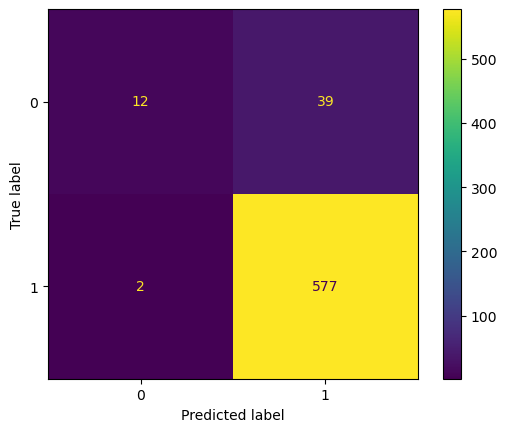

time: 297 ms (started: 2025-02-27 23:12:33 +05:30)


In [316]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

K fold cross-validation

In [317]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9369047619047619
Standard Variance : 0.007622766949324793
time: 53.9 s (started: 2025-02-27 23:13:00 +05:30)


In [318]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

time: 0 ns (started: 2025-02-27 23:13:54 +05:30)


In [319]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

time: 1min 17s (started: 2025-02-27 23:13:54 +05:30)


In [320]:
#Getting the best parameters from the grid search

print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}
time: 0 ns (started: 2025-02-27 23:15:11 +05:30)


In [321]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.99900793650794
Cross validation mean accuracy on test set : 92.32638888888889
Accuracy score for test set : 0.9349206349206349
time: 0 ns (started: 2025-02-27 23:15:11 +05:30)


In [49]:
#Saving the RF classifier
path = r"C:\Users\Prathamesh\Desktop\Sentiment\Model\model_rf"
pickle.dump(model_rf, open(path, "wb"))

### XgBoost

In [324]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],


}

# Define stratified K-fold cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize the model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scl, y_train)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


exception calling callback for <Future at 0x248218ba1a0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Prathamesh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\Prathamesh\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\__init__.py", line 82, in <module>
    from .base import clone
  File "C:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\base.py", line 17, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\Prathamesh\anaconda3\lib\site-packages\sklearn\utils\__init__.py", line 17, in <module>
    from scipy.sparse import issparse
  File "C:\Users\Prathamesh\anaconda3\lib\site-packages\scipy\sparse\__init__.py", line 267, i

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

time: 2.2 s (started: 2025-02-27 23:16:56 +05:30)


In [325]:
# Use the best parameters from GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

# Train the model using the best parameters
model_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train_scl, y_train)

# Predictions on training and test set
y_train_pred = model_xgb.predict(X_train_scl)
y_test_pred = model_xgb.predict(X_test_scl)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.975
Test Accuracy: 0.9365079365079365
time: 54.1 s (started: 2025-02-27 23:17:09 +05:30)


In [326]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

time: 15.5 s (started: 2025-02-27 23:18:03 +05:30)


In [327]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9734126984126984
Testing Accuracy : 0.9333333333333333
time: 313 ms (started: 2025-02-27 23:18:19 +05:30)


In [328]:
y_preds = model_xgb.predict(X_test)

time: 63 ms (started: 2025-02-27 23:18:19 +05:30)


In [329]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 17  34]
 [ 10 569]]
time: 16 ms (started: 2025-02-27 23:18:19 +05:30)


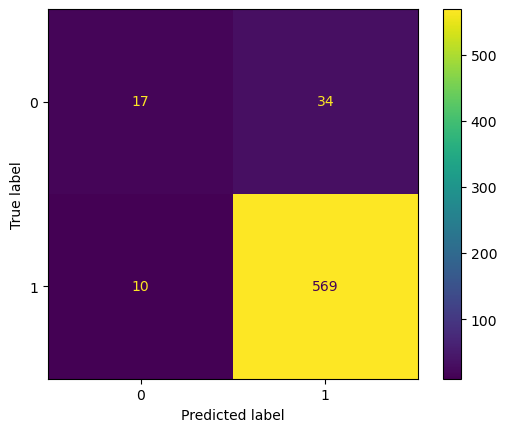

time: 219 ms (started: 2025-02-27 23:18:19 +05:30)


In [330]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [58]:
#Saving the XGBoost classifier
path = r"C:\Users\Prathamesh\Desktop\Sentiment\Model\model_xgb.pkl"
pickle.dump(model_rf, open(path, "wb"))

time: 31 ms (started: 2025-02-27 09:52:05 +05:30)


In [ ]:
# #Saving the XGBoost classifier
# pickle.dump(model_xgb, open('Model/model_xgb.pkl', 'wb'))

### Decision Tree Classifier

In [331]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

time: 3.28 s (started: 2025-02-27 23:22:09 +05:30)


In [332]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9936507936507937
Testing Accuracy : 0.9126984126984127
time: 32 ms (started: 2025-02-27 23:22:12 +05:30)


In [333]:
y_preds = model_dt.predict(X_test)

time: 15 ms (started: 2025-02-27 23:22:22 +05:30)


In [334]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  26]
 [ 63 516]]
time: 0 ns (started: 2025-02-27 23:22:24 +05:30)


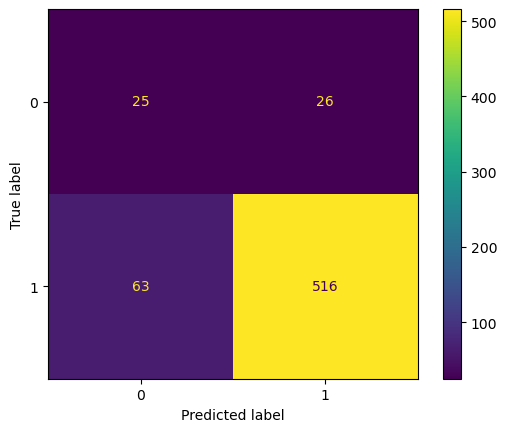

time: 281 ms (started: 2025-02-27 23:22:46 +05:30)


In [335]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [64]:
#Saving the Decision Tree classifier
path = r"C:\Users\Prathamesh\Desktop\Sentiment\Model\model_dt.pkl.pkl"
pickle.dump(model_rf, open(path, "wb"))

time: 15 ms (started: 2025-02-27 09:52:28 +05:30)


In [ ]:
# #Saving the Decision Tree classifier
# pickle.dump(model_dt, open('Model/model_dt.pkl', 'wb'))

### prediction

## 1.XGBoost

In [182]:
predictor = pickle.load(open(r"C:\Users\Prathamesh\Desktop\Sentiment\Model/model_xgb.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

time: 31 ms (started: 2025-02-27 10:20:01 +05:30)


In [67]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

time: 437 ms (started: 2025-02-27 09:53:10 +05:30)


In [129]:
text = df["verified_reviews"][1]
text

'loved it'

time: 0 ns (started: 2025-02-27 10:10:33 +05:30)


In [108]:
df.shape

(3150, 5)

time: 0 ns (started: 2025-02-27 10:04:15 +05:30)


In [183]:
texts = []
for i in range(df.shape[0]):
    text = df["verified_reviews"][i]
    texts.append(text)

print(texts[3047])

echo dot responds to us when we are not even talking to it  i have unplugged it  it feels like it is  spying  on us
time: 31 ms (started: 2025-02-27 10:20:12 +05:30)


In [100]:
def single_prediction(predictor, scaler, cv, text_input):
    corpus = []
    stemmer = PorterStemmer()
    review = re.sub("[^a-zA-Z]", " ", text_input)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)
    X_prediction = cv.transform(corpus).toarray()
    X_prediction_scl = scaler.transform(X_prediction)
    y_predictions = predictor.predict_proba(X_prediction_scl)
    y_predictions = y_predictions.argmax(axis=1)[0]

    return "Positive" if y_predictions == 1 else "Negative"

time: 0 ns (started: 2025-02-27 09:57:52 +05:30)


In [184]:
predicted_sentiment = single_prediction(predictor, scaler, cv, texts[3047])
predicted_sentiment

'Positive'

time: 16 ms (started: 2025-02-27 10:20:20 +05:30)


## 2. RF

In [176]:
predictor = pickle.load(open(r"C:\Users\Prathamesh\Desktop\Sentiment\Model/model_rf", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

time: 16 ms (started: 2025-02-27 10:19:36 +05:30)


In [178]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

time: 281 ms (started: 2025-02-27 10:19:46 +05:30)


In [180]:
texts = []
for i in range(df.shape[0]):
    text = df["verified_reviews"][i]
    texts.append(text)

print(texts[3047])

echo dot responds to us when we are not even talking to it  i have unplugged it  it feels like it is  spying  on us
time: 31 ms (started: 2025-02-27 10:19:53 +05:30)


In [181]:
predicted_sentiment = single_prediction(predictor, scaler, cv, texts[3047])
predicted_sentiment

'Positive'

time: 16 ms (started: 2025-02-27 10:19:56 +05:30)


## 3. DT

In [158]:
predictor = pickle.load(open(r"C:\Users\Prathamesh\Desktop\Sentiment\Model/model_dt.pkl.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

time: 16 ms (started: 2025-02-27 10:16:00 +05:30)


In [159]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

time: 329 ms (started: 2025-02-27 10:16:03 +05:30)


In [175]:
texts = []
for i in range(df.shape[0]):
    text = df["verified_reviews"][i]
    texts.append(text)

print(texts[3048])

not connected to my phone playlist
time: 32 ms (started: 2025-02-27 10:19:25 +05:30)


In [174]:
predicted_sentiment = single_prediction(predictor, scaler, cv, texts[3048])
predicted_sentiment

'Negative'

time: 16 ms (started: 2025-02-27 10:19:17 +05:30)


In [167]:
df[df['feedback'] == 0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,it s like siri in fact siri answers more acc...,0
111,2,30-Jul-18,Charcoal Fabric,sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,not much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working after 2 weeks did not follow ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,echo dot responds to us when we are not even t...,0
3048,1,30-Jul-18,White Dot,not connected to my phone playlist,0
3067,2,30-Jul-18,Black Dot,the only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,i didn t order it,0


time: 31 ms (started: 2025-02-27 10:17:55 +05:30)


### Using Advance Transformer tech

In [185]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


time: 31 ms (started: 2025-02-27 10:36:37 +05:30)


In [186]:
df.shape

(3150, 5)

time: 15 ms (started: 2025-02-27 10:36:51 +05:30)


In [187]:
df['verified_reviews'] = df['verified_reviews'].apply(preprocess)

time: 656 ms (started: 2025-02-27 10:38:08 +05:30)


In [222]:
df = df.sample(1000)

time: 62 ms (started: 2025-02-27 12:38:17 +05:30)


## Step 1. VADER Sentiment Scoring

In [189]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prathamesh\AppData\Roaming\nltk_data...


True

time: 1.39 s (started: 2025-02-27 10:39:00 +05:30)


In [190]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

time: 63 ms (started: 2025-02-27 10:39:05 +05:30)


In [193]:
# testing of polarity score
print(sia.polarity_scores('I am so happy!'))
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

time: 0 ns (started: 2025-02-27 10:39:57 +05:30)


In [194]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['verified_reviews']
    #myid = row['Id']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/3150 [00:00<?, ?it/s]

time: 1.11 s (started: 2025-02-27 10:41:33 +05:30)


In [197]:
# creating DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})


time: 93 ms (started: 2025-02-27 10:42:53 +05:30)


In [200]:
vaders.head()

,Id,neg,neu,pos,compound
0,0,0.000,0.323,0.677,0.6369
1,1,0.000,0.204,0.796,0.5994
2,2,0.102,0.784,0.114,-0.1280
3,3,0.000,0.617,0.383,0.9169
4,4,0.000,1.000,0.000,0.0000


time: 0 ns (started: 2025-02-27 10:44:07 +05:30)


In [205]:
df = df.reset_index().rename(columns={'index': 'Id'})

time: 16 ms (started: 2025-02-27 10:45:42 +05:30)


In [206]:
df.head(5)

,Id,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,4,5,31-Jul-18,Charcoal Fabric,music,1


time: 0 ns (started: 2025-02-27 10:45:45 +05:30)


In [207]:
# Mearging with original DataFrame
vaders = vaders.merge(df, how='left')

time: 31 ms (started: 2025-02-27 10:45:51 +05:30)


In [208]:
vaders

,Id,neg,neu,pos,compound,rating,date,variation,verified_reviews,feedback
0,0,0.000,0.323,0.677,0.6369,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,1,0.000,0.204,0.796,0.5994,5,31-Jul-18,Charcoal Fabric,loved it,1
2,2,0.102,0.784,0.114,-0.1280,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,3,0.000,0.617,0.383,0.9169,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,4,0.000,1.000,0.000,0.0000,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...,...,...,...,...,...
3145,3145,0.000,0.654,0.346,0.5719,5,30-Jul-18,Black Dot,perfect for kids adults and everyone in between,1
3146,3146,0.000,1.000,0.000,0.0000,5,30-Jul-18,Black Dot,listening to music searching locations checkin...,1
3147,3147,0.028,0.735,0.237,0.9485,5,30-Jul-18,Black Dot,i do love these things i have them running my ...,1
3148,3148,0.083,0.833,0.083,0.0008,5,30-Jul-18,White Dot,only complaint i have is that the sound qualit...,1


time: 15 ms (started: 2025-02-27 10:45:56 +05:30)


## Plotting Vaders graph - between feedback and compound

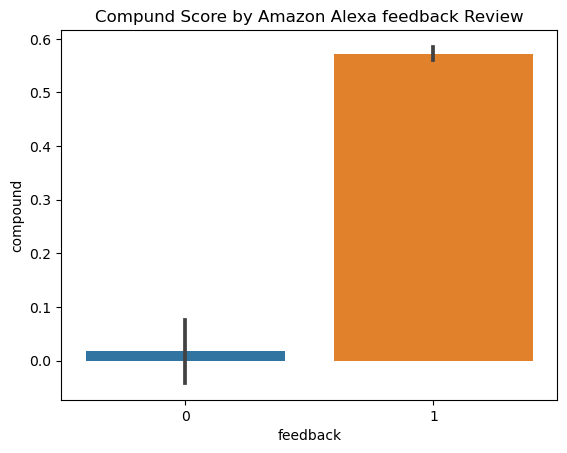

time: 156 ms (started: 2025-02-27 10:49:28 +05:30)


In [212]:
ax = sns.barplot(data=vaders, x='feedback', y='compound')
ax.set_title('Compund Score by Amazon Alexa feedback Review')
plt.show()

## Plotting Vaders graph - between Rating and compound

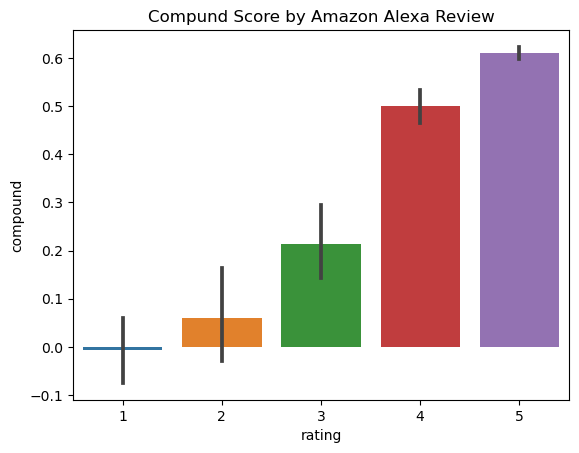

time: 422 ms (started: 2025-02-27 10:47:50 +05:30)


In [209]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Alexa Review')
plt.show()

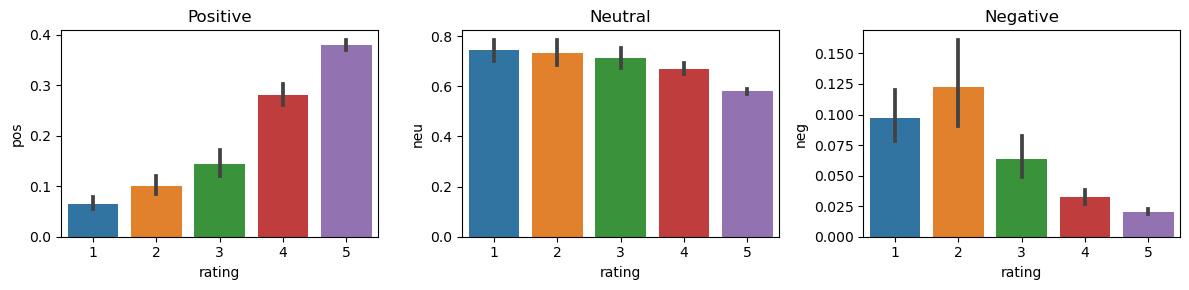

time: 625 ms (started: 2025-02-27 10:50:15 +05:30)


In [213]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [214]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

time: 8 s (started: 2025-02-27 11:19:02 +05:30)


In [215]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

time: 4min 42s (started: 2025-02-27 11:19:16 +05:30)


In [225]:
df.shape

(1000, 6)

time: 16 ms (started: 2025-02-27 12:39:21 +05:30)


In [233]:
example = df['verified_reviews'].values[3]
example

'love the echo show great in kitchen for recipes'

time: 16 ms (started: 2025-02-27 12:40:17 +05:30)


In [234]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0017497467, 'roberta_neu': 0.016174013, 'roberta_pos': 0.98207617}
time: 953 ms (started: 2025-02-27 12:40:28 +05:30)


In [235]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

time: 0 ns (started: 2025-02-27 12:40:40 +05:30)


In [236]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['verified_reviews']
        
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for id {i}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 2016
time: 2h 38min 36s (started: 2025-02-27 12:40:44 +05:30)


In [237]:
df.head()

,Id,rating,date,variation,verified_reviews,feedback
861,861,3,30-Jul-18,Charcoal Fabric,i like the product except that the speakers ar...,1
75,75,5,30-Jul-18,Charcoal Fabric,it s awesome,1
1698,1698,4,28-Jul-18,Black Show,still trying to figure out how to link to blue...,1
1502,1502,5,30-Jul-18,White Show,love the echo show great in kitchen for recipes,1
276,276,5,29-Jul-18,Sandstone Fabric,sound quality is great still learning about al...,1


time: 47 ms (started: 2025-02-27 15:19:31 +05:30)


In [240]:
df.drop("Id",inplace= True ,axis =1)

time: 62 ms (started: 2025-02-27 15:22:01 +05:30)


In [243]:
df.head()

,Id,rating,date,variation,verified_reviews,feedback
0,861,3,30-Jul-18,Charcoal Fabric,i like the product except that the speakers ar...,1
1,75,5,30-Jul-18,Charcoal Fabric,it s awesome,1
2,1698,4,28-Jul-18,Black Show,still trying to figure out how to link to blue...,1
3,1502,5,30-Jul-18,White Show,love the echo show great in kitchen for recipes,1
4,276,5,29-Jul-18,Sandstone Fabric,sound quality is great still learning about al...,1


time: 16 ms (started: 2025-02-27 15:22:21 +05:30)


In [242]:
df = df.reset_index().rename(columns={'index': 'Id'})

time: 31 ms (started: 2025-02-27 15:22:17 +05:30)


In [244]:
results_df = pd.DataFrame(res).T

time: 63 ms (started: 2025-02-27 15:22:57 +05:30)


In [246]:
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

time: 125 ms (started: 2025-02-27 15:23:28 +05:30)


In [247]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,date,variation,verified_reviews,feedback
0,861,0.0,0.828,0.172,0.3612,0.382682,0.422405,0.194913,3,30-Jul-18,Charcoal Fabric,i like the product except that the speakers ar...,1
1,75,0.0,0.196,0.804,0.6249,0.003106,0.023368,0.973526,5,30-Jul-18,Charcoal Fabric,it s awesome,1
2,1698,0.0,1.000,0.000,0.0000,0.442403,0.526918,0.030679,4,28-Jul-18,Black Show,still trying to figure out how to link to blue...,1
3,1502,0.0,0.458,0.542,0.8519,0.001750,0.016174,0.982076,5,30-Jul-18,White Show,love the echo show great in kitchen for recipes,1
4,276,0.0,0.654,0.346,0.8126,0.001920,0.014734,0.983346,5,29-Jul-18,Sandstone Fabric,sound quality is great still learning about al...,1


time: 15 ms (started: 2025-02-27 15:23:40 +05:30)


### Compare Scores between models

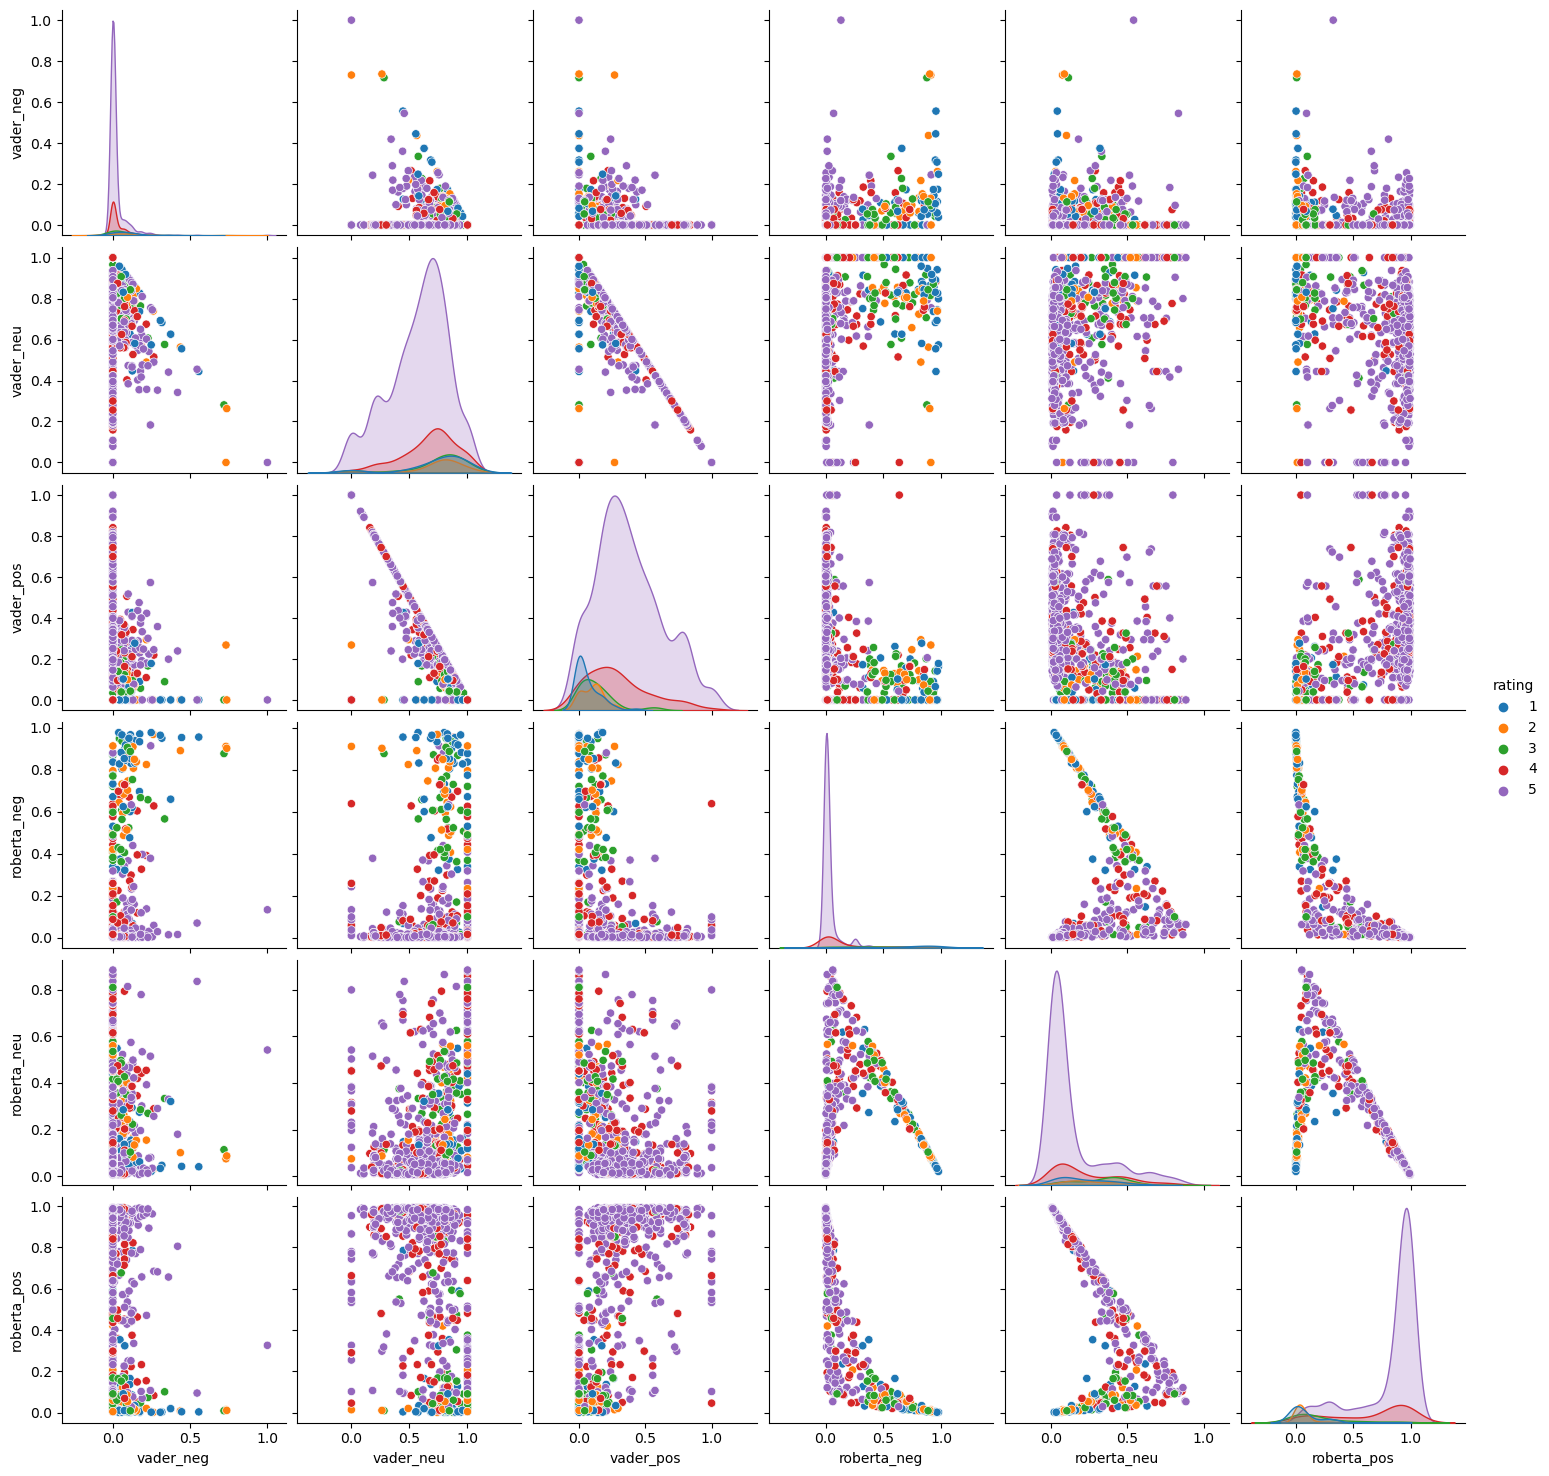

time: 20.5 s (started: 2025-02-27 15:24:45 +05:30)


In [249]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

## Review Examples:

Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

### positive sentiment 1-Star view

In [251]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['verified_reviews'].values[0]

'received the wrong product was so excited to install it all excitement gone thank you amazon'

time: 16 ms (started: 2025-02-27 15:26:01 +05:30)


In [252]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['verified_reviews'].values[0]

'received the wrong product was so excited to install it all excitement gone thank you amazon'

time: 0 ns (started: 2025-02-27 15:26:27 +05:30)


### nevative sentiment 5-Star view

In [254]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['verified_reviews'].values[0]

'dislike the volume it does not sound loud enough'

time: 0 ns (started: 2025-02-27 15:26:42 +05:30)


In [255]:
results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['verified_reviews'].values[0]

'no problem'

time: 16 ms (started: 2025-02-27 15:26:54 +05:30)


In [273]:
results_df["verified_reviews"][300]

'love it small with good sound'

time: 0 ns (started: 2025-02-27 18:12:46 +05:30)


## Predictions

XGBoost


In [ ]:
predictor = pickle.load(open(r"Model/model_xgb.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

In [ ]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[111]

0

In [ ]:
df["verified_reviews"][141]

'not much features'

In [ ]:
df[df['feedback'] == 0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,it s like siri in fact siri answers more acc...,0
111,2,30-Jul-18,Charcoal Fabric,sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,not much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working after 2 weeks did not follow ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,echo dot responds to us when we are not even t...,0
3048,1,30-Jul-18,White Dot,not connected to my phone playlist,0
3067,2,30-Jul-18,Black Dot,the only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,i didn t order it,0


### RF

In [ ]:
predictor = pickle.load(open(r"Model/model_rf.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

In [ ]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[141]

0

### DT

In [ ]:
predictor = pickle.load(open(r"Model/model_dt.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[162]

0

### End